# Importation des données

In [105]:
# pip install POT

In [90]:
# pip install google-colab
# !pip install nltk
# nltk.download()

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
file_path = "../Data/companies_description.csv"
data = pd.read_csv(file_path)
data = data.drop(columns='Unnamed: 0')

condition = (data['companyName'].isna()) | (data['description'].isna() | data['country'].isna())
index_to_drop = data[condition].index
data = data.drop(index_to_drop)

data = data.reset_index(drop=True)

In [3]:
data

,companyName,exchange,industry,website,description,sector,country
0,Visa Inc.,New York Stock Exchange,Credit Services,https://usa.visa.com,Visa Inc. operates as a payments technology co...,Financial Services,US
1,"Texas Roadhouse, Inc.",NASDAQ Global Select,Restaurants,https://www.texasroadhouse.com,"Texas Roadhouse, Inc., together with its subsi...",Consumer Cyclical,US
2,"Lamb Weston Holdings, Inc.",New York Stock Exchange,Packaged Foods,https://www.lambweston.com,"Lamb Weston Holdings, Inc. produces, distribut...",Consumer Defensive,US
3,Intact Financial Corporation,Toronto Stock Exchange,Insurance—Property & Casualty,https://www.intactfc.com,"Intact Financial Corporation, through its subs...",Financial Services,CA
4,"OPKO Health, Inc.",NASDAQ Global Select,Diagnostics & Research,https://www.opko.com,"OPKO Health, Inc., a healthcare company, engag...",Healthcare,US
...,...,...,...,...,...,...,...
37579,Relativity Acquisition Corp.,NASDAQ Global Market,Shell Companies,https://www.relativityacquisitions.com,Relativity Acquisition Corp. does not have sig...,Financial Services,US
37580,Prima Industrie SpA,Milan,Specialty Industrial Machinery,https://www.primaindustrie.com,"Prima Industrie SpA develops, manufactures, an...",Industrials,IT
37581,PT Putra Rajawali Kencana Tbk,Jakarta Stock Exchange,Trucking,https://puratrans.com,PT Putra Rajawali Kencana Tbk engages in the t...,Industrials,ID
37582,"Agritek Holdings, Inc.",Other OTC,Real Estate Services,https://www.agritekholdings.com,"Agritek Holdings, Inc. distributes hemp and ca...",Real Estate,US


# Tokenization : plus besoin de le run, car le fichier data_tokenized.csv est créé

## NLTK

In [8]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\romai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [95]:
# desc0 = data['description'].tolist()[0]

In [96]:
# sentences = sent_tokenize(desc0)
# words = word_tokenize(desc0)

In [97]:
# [wrd.lower() for wrd in words if wrd.lower() not in stopwords.words('english') and wrd not in string.punctuation]

(avec stemming) temps d'execution pour 37 000 entreprises : 13 minutes
(sans stemming) temps d'execution pour 37 000 entreprises : 11 minutes


In [98]:
# stemmer = nltk.stem.SnowballStemmer('english')
# pstemmer = nltk.stem.PorterStemmer()
# lemma = nltk.wordnet.WordNetLemmatizer()
# lemma.lemmatize('walking')
# stemmer.stem('walking')
# opko, health, inc., healthcare, company

In [9]:
stemmer = nltk.stem.SnowballStemmer('english')

def preprocess_description_with_stem(description, stem=True):
    words = word_tokenize(description)
    return [stemmer.stem(word.lower()) for word in words if word.lower() not in stopwords.words('english') and word not in string.punctuation]
 

def preprocess_description_raw(description):
    """
    same as preprocess_description_with_stem, but without stem
    """
    words = word_tokenize(description)
    return [word.lower() for word in words if word.lower() not in stopwords.words('english') and word not in string.punctuation]
    

# data = data.iloc[:100]
data['description_stem'] = data['description'].apply(preprocess_description_with_stem)
# data['description_raw'] = data['description'].apply(preprocess_description_raw)

KeyboardInterrupt: 

In [ ]:
data.head()

In [14]:
# type(data.iloc[0]['description_raw'])

list

In [ ]:
data.to_csv("../Data/data_tokenized_stem.csv", index=True)

In [ ]:
old_data = data.copy()

In [ ]:
data

# Vectorisation

temps d'exe pour 37000 : 8 sec

In [20]:
data = pd.read_csv("../Data/data_tokenized_stem.csv").drop(columns="Unnamed: 0")

In [23]:
data = data.drop(columns=['exchange', 'website'])
data['country'] = data['country'].replace({'GB':'UK',
                                               'TW':'CN',
                                               'GG':'FR',
                                               'RE':'FR',
                                               'GF':'FR',
                                               'MQ':'UK',
                                               'JE':'UK',
                                               'AI':'UK',
                                               'AN':'NL',
                                               'GI':'UK'})

In [ ]:
data

In [24]:
def load_preprocess_data_tokenized():
    # data = pd.read_csv("../Data/data_tokenized.csv")
    data = pd.read_csv("../Data/data_tokenized_stem.csv")
    data = data.drop(columns='Unnamed: 0')
    # data['description_raw'] = data['description_raw'].apply(eval)    
    data['description_stem'] = data['description_stem'].apply(eval)    
    # data['description'] = data['description'].apply(eval)  # pour reconvertir la string en list
    # data['country'] = data['country'].apply(eval)  # pour reconvertir la string en list
    data = data.drop_duplicates('companyName')
    # data['description'] = data.apply(lambda row: row['description'] + [row['country'], row['sector']], axis=1)
    # data['description_raw'] = data.apply(lambda row: row['description_raw'] + [row['country'], row['sector']], axis=1)
    data['description_stem'] = data.apply(lambda row: row['description_stem'] + [row['country'], row['sector']], axis=1)
    data = data.drop(columns=['exchange', 'website'])
    data['country'] = data['country'].replace({'GB':'UK',
                                               'TW':'CN',
                                               'GG':'FR',
                                               'RE':'FR',
                                               'GF':'FR',
                                               'MQ':'UK',
                                               'JE':'UK',
                                               'AI':'UK',
                                               'AN':'NL',
                                               'GI':'UK'})
    return data

In [25]:
load_preprocess_data_tokenized()

,companyName,industry,description,sector,country,description_stem
0,Visa Inc.,Credit Services,Visa Inc. operates as a payments technology co...,Financial Services,US,"[visa, inc., oper, payment, technolog, compani..."
1,"Texas Roadhouse, Inc.",Restaurants,"Texas Roadhouse, Inc., together with its subsi...",Consumer Cyclical,US,"[texa, roadhous, inc., togeth, subsidiari, ope..."
2,"Lamb Weston Holdings, Inc.",Packaged Foods,"Lamb Weston Holdings, Inc. produces, distribut...",Consumer Defensive,US,"[lamb, weston, hold, inc., produc, distribut, ..."
3,Intact Financial Corporation,Insurance—Property & Casualty,"Intact Financial Corporation, through its subs...",Financial Services,CA,"[intact, financi, corpor, subsidiari, provid, ..."
4,"OPKO Health, Inc.",Diagnostics & Research,"OPKO Health, Inc., a healthcare company, engag...",Healthcare,US,"[opko, health, inc., healthcar, compani, engag..."
...,...,...,...,...,...,...
37577,"Global Brokerage, Inc.",Financial Data & Stock Exchanges,"Global Brokerage, Inc., through its subsidiari...",Financial Services,US,"[global, brokerag, inc., subsidiari, provid, o..."
37580,Prima Industrie SpA,Specialty Industrial Machinery,"Prima Industrie SpA develops, manufactures, an...",Industrials,IT,"[prima, industri, spa, develop, manufactur, ma..."
37581,PT Putra Rajawali Kencana Tbk,Trucking,PT Putra Rajawali Kencana Tbk engages in the t...,Industrials,ID,"[pt, putra, rajawali, kencana, tbk, engag, tra..."
37582,"Agritek Holdings, Inc.",Real Estate Services,"Agritek Holdings, Inc. distributes hemp and ca...",Real Estate,US,"[agritek, hold, inc., distribut, hemp, cannabi..."


In [ ]:
# data['description'] = data['description'].apply(lambda x: [token for token in x if not token.isdigit()])

Temps d'execution pour 37 000 entreprises : 13s

In [26]:
from scipy import sparse

def build_tfidf(df):
  tfidf_vectorizer = TfidfVectorizer(max_features=5000)

  tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_stem'].astype(str))

  list(tfidf_matrix)
  # print(pd.Series(tfidf_matrix.toarray()))
  sparse.save_npz("../Data/tfidf_matrix.npz", tfidf_matrix)

  df['vec_tfidf'] = list(tfidf_matrix)
  # data['vec_tfidf']=tfidf_matrix.toarray()

  # feature_names = tfidf_vectorizer.get_feature_names_out()
  return df

In [27]:
data = load_preprocess_data_tokenized()
data = build_tfidf(data)

In [28]:
data['vec_tfidf'].iloc[0].toarray()
# Assuming tfidf_matrix is your TF-IDF sparse matrix
print(data['vec_tfidf'].iloc[0].toarray())   

[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# data['vec_tfidf'].values[0].toarray()

## Word2Vec

In [51]:
desc0 = data['description_stem'][0]
desc0

['visa',
 'inc.',
 'oper',
 'payment',
 'technolog',
 'compani',
 'worldwid',
 'compani',
 'facilit',
 'digit',
 'payment',
 'among',
 'consum',
 'merchant',
 'financi',
 'institut',
 'busi',
 'strateg',
 'partner',
 'govern',
 'entiti',
 'oper',
 'visanet',
 'transact',
 'process',
 'network',
 'enabl',
 'author',
 'clear',
 'settlement',
 'payment',
 'transact',
 'addit',
 'compani',
 'offer',
 'card',
 'product',
 'platform',
 'value-ad',
 'servic',
 'provid',
 'servic',
 'visa',
 'visa',
 'electron',
 'interlink',
 'vpay',
 'plus',
 'brand',
 'visa',
 'inc.',
 'strateg',
 'agreement',
 'ooredoo',
 'provid',
 'enhanc',
 'payment',
 'experi',
 'visa',
 'cardhold',
 'ooredoo',
 'custom',
 'qatar',
 'visa',
 'inc.',
 'found',
 '1958',
 'headquart',
 'san',
 'francisco',
 'california',
 'US',
 'Financial Services']

In [18]:
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api
from gensim.downloader import load

model = load('word2vec-google-news-300')

path = api.load("word2vec-google-news-300", return_path=True)

# Chargez le modèle Word2Vec
word2vec_model = KeyedVectors.load_word2vec_format(path, binary=True)
#model = Word2Vec.load(path)

def calculate_average_word2vec(tokens, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0

    for token in tokens:
        if token in model:  # Directly check in the model
            nwords += 1
            feature_vector = np.add(feature_vector, model[token])  # Directly access the vector

    if nwords > 0:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

data['description_word2vec'] = data['description'].apply(
    lambda x: calculate_average_word2vec(x, model, num_features=300)
)



[--------------------------------------------------] 1.7% 28.9/1662.8MB downloaded

KeyboardInterrupt: 

# Calcul de distances

In [64]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.spatial import distance
import pandas as pd

### Cosine distance

In [ ]:
# data.loc[data['companyName'] == 'Visa Inc.']['vec_tfidf'].iloc[0].toarray()
# data

In [11]:
from numpy.linalg import norm

def euclidean_distance(vec1, vec2):
    return norm(vec1 - vec2)

Temps d'execution pour 37 000 entreprises : plante car la RAM est insuffisante (13 gb)

In [12]:
def find_similar_companies(target_company, df, vector_column='vec_tfidf', n=5, method='tfidf', metric='cosine'):
    # Ensure the target company exists in the DataFrame
    if target_company not in df['companyName'].values:
        print("Vérifier le nom de l'entreprise.")
        return pd.DataFrame()

    # Get the vector of the target company
    target_vector = df.loc[df['companyName'] == target_company, vector_column].iloc[0]

    # For TF-IDF, convert sparse matrix to dense array if needed
    if method == 'tfidf' and hasattr(target_vector, "toarray"):
        target_vector = target_vector.toarray()[0]
        df = df.copy()  # Avoid modifying the original DataFrame
        df[vector_column] = df[vector_column].apply(lambda x: x.toarray()[0] if hasattr(x, "toarray") else x)

    # Compute similarities or distances
    if metric == 'cosine':
        similarities = cosine_similarity([target_vector], list(df[vector_column]))
        similarity_column = 'Similarity'
        scores = similarities[0]
    elif metric == 'euclidean':
        distances = euclidean_distances([target_vector], list(df[vector_column]))
        similarity_column = 'Distance'
        scores = distances.flatten()
        scores = 1 / (0.0001 + scores)  # Inverting distances to make them similar to similarity scores

    # Create a DataFrame for similar companies
    similar_companies = pd.DataFrame({'companyName': df['companyName'], similarity_column: scores})
    sort_ascending = True if metric == 'euclidean' else False
    similar_companies = similar_companies.sort_values(by=similarity_column, ascending=sort_ascending)

    # Exclude the target company from the results
    similar_companies = similar_companies[similar_companies['companyName'] != target_company]

    return similar_companies.head(n)

# Example usage
result_tfidf_cosine = find_similar_companies("Visa Inc.", data, 'vec_tfidf', n=10, method='tfidf', metric='cosine')
result_tfidf_euclidean = find_similar_companies("Visa Inc.", data, 'vec_tfidf', n=10, method='tfidf', metric='euclidean')

result_word2vec_cosine = find_similar_companies("Visa Inc.", data, 'description_word2vec', n=10, method='word2vec', metric='cosine')
result_word2vec_euclidean = find_similar_companies("Visa Inc.", data, 'description_word2vec', n=10, method='word2vec', metric='euclidean')

print("TF-IDF Cosine Similarity:\n", result_tfidf_cosine)

print("\nWord2Vec Cosine Similarity:\n", result_word2vec_cosine)


TF-IDF Cosine Similarity:
                               companyName  Similarity
18055  BLS International Services Limited    0.415832
1077                            Mogo Inc.    0.311937
4973                           Adyen N.V.    0.292689
916               Mastercard Incorporated    0.292129
5910                           Usio, Inc.    0.268081
13926                            XTM Inc.    0.261167
1153               AppTech Payments Corp.    0.247371
15013                       Isracard Ltd.    0.245550
11669                   Plexian AB (publ)    0.244023
1553                  ACI Worldwide, Inc.    0.231816

Word2Vec Cosine Similarity:
                      companyName  Similarity
916      Mastercard Incorporated    0.901665
1077                   Mogo Inc.    0.900398
5910                  Usio, Inc.    0.889770
28560  GMO Payment Gateway, Inc.    0.889736
2600               EVERTEC, Inc.    0.889080
1975                Fiserv, Inc.    0.886142
887           i3 Verticals, Inc.  

In [19]:
result_tfidf_cosine = find_similar_companies("Visa Inc.", data, 'vec_tfidf', n=10, method='tfidf', metric='cosine')

result_word2vec_cosine = find_similar_companies("Visa Inc.", data, 'description_word2vec', n=10, method='word2vec', metric='cosine')

print("TF-IDF Cosine Similarity:\n", result_tfidf_cosine)

print("\nWord2Vec Cosine Similarity:\n", result_word2vec_cosine)


TF-IDF Cosine Similarity:
                               companyName  Similarity
18055  BLS International Services Limited    0.415832
1077                            Mogo Inc.    0.311937
4973                           Adyen N.V.    0.292689
916               Mastercard Incorporated    0.292129
5910                           Usio, Inc.    0.268081
13926                            XTM Inc.    0.261167
1153               AppTech Payments Corp.    0.247371
15013                       Isracard Ltd.    0.245550
11669                   Plexian AB (publ)    0.244023
1553                  ACI Worldwide, Inc.    0.231816

Word2Vec Cosine Similarity:
                      companyName  Similarity
916      Mastercard Incorporated    0.901665
1077                   Mogo Inc.    0.900398
5910                  Usio, Inc.    0.889770
28560  GMO Payment Gateway, Inc.    0.889736
2600               EVERTEC, Inc.    0.889080
1975                Fiserv, Inc.    0.886142
887           i3 Verticals, Inc.  

## Performance tests Using GPT 

In [14]:
test_cases = {
    "Visa Inc.": [
        "Mastercard Incorporated", "American Express Company", "PayPal Holdings, Inc.",
        "JPMorgan Chase & Co.", "Citigroup Inc.", "Goldman Sachs Group, Inc.",
        "Morgan Stanley", "Bank of America Corporation", "Wells Fargo & Company",
        "U.S. Bancorp"],
    "Texas Roadhouse, Inc.": [
        "McDonald’s Corp.", "Yum! Brands, Inc.", "Chipotle Mexican Grill, Inc.",
        "Starbucks Corporation", "Domino's Pizza, Inc.", "Burger King", 
        "Denny's Corporation", "Wendy's Company", "Papa John's International, Inc.", 
        "Jack in the Box Inc."],
    "Lamb Weston Holdings, Inc.": [
        "Kraft Heinz Company", "Tyson Foods, Inc.", "Hormel Foods Corporation",
        "Sysco Corporation", "PepsiCo, Inc.", "Conagra Brands, Inc.", "Kellogg Company",
        "General Mills, Inc.", "Campbell Soup Company", "The Hershey Company"],
    "Intact Financial Corporation": [
        "MetLife, Inc.", "Prudential Financial, Inc.", "The Travelers Companies, Inc.",
        "Allstate Corporation", "American International Group, Inc.", "Progressive Corporation",
        "State Farm Insurance", "Liberty Mutual Insurance Company", "Chubb Limited",
        "Zurich Insurance Group"],
    "OPKO Health, Inc.": [
        "Pfizer Inc.", "Johnson & Johnson", "Merck & Co., Inc.", "Gilead Sciences, Inc.",
        "Amgen Inc.", "AbbVie Inc.", "Bristol Myers Squibb Company", "Sanofi", 
        "GlaxoSmithKline plc", "Novartis AG"],
    "Ferroglobe PLC": [
        "BHP Group", "Rio Tinto Group", "Vale S.A.", "Glencore plc", "Anglo American plc",
        "Freeport-McMoRan Inc.", "Alcoa Corporation", "ArcelorMittal", "Teck Resources Limited",
        "Nucor Corporation"],
    "Hanesbrands Inc.": [
        "Levi Strauss & Co.", "PVH Corp.", "Ralph Lauren Corporation", "Gap Inc.",
        "L Brands, Inc.", "Under Armour, Inc.", "VF Corporation", "Columbia Sportswear Company",
        "American Eagle Outfitters, Inc.", "Nordstrom, Inc."],
    "Esports Entertainment Group, Inc.": [
        "Activision Blizzard, Inc.", "Electronic Arts Inc.", "Take-Two Interactive Software, Inc.",
        "Zynga Inc.", "Ubisoft Entertainment SA", "Square Enix Holdings Co., Ltd.",
        "Bandai Namco Holdings Inc.", "Tencent Holdings Limited", "SEGA Sammy Holdings Inc.",
        "Capcom Co., Ltd."],
    "WW International, Inc.": [
        "Nutrisystem, Inc.", "Medifast, Inc.", "Herbalife Nutrition Ltd.", "Planet Fitness, Inc.",
        "Peloton Interactive, Inc.", "Nautilus, Inc.", "Fitbit, Inc.", "Lululemon Athletica Inc.",
        "Nike, Inc.", "Under Armour, Inc."],
    "CommScope Holding Company, Inc.": [
        "Cisco Systems, Inc.", "Qualcomm Incorporated", "Nokia Corporation", "Ericsson",
        "ZTE Corporation", "Huawei Technologies Co., Ltd.", "Juniper Networks, Inc.",
        "Motorola Solutions, Inc.", "Corning Incorporated", "Broadcom Inc."]
}


In [17]:
# Function to test and score the algorithm
def test_algorithm(df, test_cases):
    scores = {}  # Dictionary to hold scores for each method and metric

    for company in test_cases.keys():
        # Run the function for different methods and metrics
        results = {
            'tfidf_cosine': find_similar_companies(company, df, 'vec_tfidf', 10, 'tfidf', 'cosine'),
            'word2vec_cosine': find_similar_companies(company, df, 'description_word2vec', 10, 'word2vec', 'cosine'),
        }

        # Scoring each result
        for key, result in results.items():
            output_companies = list(result['companyName'])
            expected_companies = test_cases[company]
            score = 0

            for idx, expected_company in enumerate(expected_companies):
                if expected_company in output_companies:
                    output_idx = output_companies.index(expected_company)
                    score += 10 - abs(idx - output_idx)
                else:
                    score += 0  # Company not found, score 0

            scores.setdefault(key, 0)
            scores[key] += score

    return scores


In [18]:
# Run the test and print scores
scores = test_algorithm(data, test_cases)
print(scores)

{'tfidf_cosine': 48, 'word2vec_cosine': 61}


In [34]:
import pandas as pd


company_target =  "CommScope Holding Company, Inc."
# Assuming you have the results from your function
result_tfidf_cosine = find_similar_companies(company_target, data, 'vec_tfidf', n=10, method='tfidf', metric='cosine')
result_word2vec_cosine = find_similar_companies(company_target, data, 'description_word2vec', n=10, method='word2vec', metric='cosine')

# Extracting company names from the results
tfidf_cosine_companies = list(result_tfidf_cosine['companyName'])
word2vec_cosine_companies = list(result_word2vec_cosine['companyName'])

# Test cases for "Visa Inc."
expected_companies = test_cases[company_target]

# Creating a DataFrame to display the results
df = pd.DataFrame({
    "Expected Company": expected_companies,
    "TF-IDF Cosine Similarity": tfidf_cosine_companies,
    "Word2Vec Cosine Similarity": word2vec_cosine_companies
})

# Function to calculate score
def calculate_score(expected, actual, actual_list):
    if actual in expected:
        expected_position = expected.index(actual)
        actual_position = actual_list.index(actual)
        position_difference = abs(expected_position - actual_position)
        return max(10 - position_difference, 0)
    return 0

# Adding scores to the DataFrame
df["TF-IDF Score"] = df.apply(lambda row: calculate_score(expected_companies, row["TF-IDF Cosine Similarity"], tfidf_cosine_companies), axis=1)
df["Word2Vec Score"] = df.apply(lambda row: calculate_score(expected_companies, row["Word2Vec Cosine Similarity"], word2vec_cosine_companies), axis=1)


# Display the DataFrame
print(df)


                Expected Company         TF-IDF Cosine Similarity  \
0            Cisco Systems, Inc.               Casa Systems, Inc.   
1          Qualcomm Incorporated                      Belden Inc.   
2              Nokia Corporation  Arcadyan Technology Corporation   
3                       Ericsson       Cogeco Communications Inc.   
4                ZTE Corporation    Liberty Broadband Corporation   
5  Huawei Technologies Co., Ltd.            SITI Networks Limited   
6         Juniper Networks, Inc.                 Altice USA, Inc.   
7       Motorola Solutions, Inc.     Ortel Communications Limited   
8           Corning Incorporated             Vecima Networks Inc.   
9                  Broadcom Inc.        CyberTAN Technology, Inc.   

                  Word2Vec Cosine Similarity  TF-IDF Score  Word2Vec Score  
0               Cambium Networks Corporation             0               0  
1                      ADTRAN Holdings, Inc.             0               0  
2        

In [ ]:
# def from_token_to_ranking(name="Visa Inc."):
#   """
#   fonction de test uniquement, il ne faut pas load le csv comme cela, car il y a des traitements à faire dessus.
#   """

#   df = pd.read_csv("/content/drive/MyDrive/S9/DDEFI/Projet_DDEFI/code/data_tokenized.csv")
#   df.drop(columns='Unnamed: 0', inplace=True)
#   df=df.iloc[:10]

#   df = build_tfidf(df)

#   result_tfidf = find_similar_companies(name, df, 'vec_tfidf', n=20)
#   return result_tfidf

# # from_token_to_ranking("Visa Inc.")
# from_token_to_ranking("Texas Roadhouse, Inc.")
# #from_token_to_ranking("Lamb Weston Holdings, Inc.")
# #from_token_to_ranking("Ferroglobe PLC")

# GPD per Capita bis (world bank)

In [68]:
dict_mapping_name_abb = {
    'Aruba': 'AW',
    'Afghanistan': 'AF',
    'Angola': 'AO',
    'Albania': 'AL',
    'Andorra': 'AD',
    'United Arab Emirates': 'AE',
    'Argentina': 'AR',
    'Armenia': 'AM',
    'American Samoa': 'AS',
    'Antigua and Barbuda': 'AG',
    'Australia': 'AU',
    'Austria': 'AT',
    'Azerbaijan': 'AZ',
    'Burundi': 'BI',
    'Belgium': 'BE',
    'Benin': 'BJ',
    'Burkina Faso': 'BF',
    'Bangladesh': 'BD',
    'Bulgaria': 'BG',
    'Bahrain': 'BH',
    'Bahamas, The': 'BS',
    'Bosnia and Herzegovina': 'BA',
    'Belarus': 'BY',
    'Belize': 'BZ',
    'Bermuda': 'BM',
    'Bolivia': 'BO',
    'Brazil': 'BR',
    'Barbados': 'BB',
    'Brunei Darussalam': 'BN',
    'Bhutan': 'BT',
    'Botswana': 'BW',
    'Central African Republic': 'CF',
    'Canada': 'CA',
    'Switzerland': 'CH',
    'Channel Islands': 'XK',
    'Chile': 'CL',
    'China': 'CN',
    "Cote d'Ivoire": 'CI',
    'Cameroon': 'CM',
    'Congo, Dem. Rep.': 'CD',
    'Congo, Rep.': 'CG',
    'Colombia': 'CO',
    'Comoros': 'KM',
    'Cabo Verde': 'CV',
    'Costa Rica': 'CR',
    'Cuba': 'CU',
    'Curacao': 'CW',
    'Cayman Islands': 'KY',
    'Cyprus': 'CY',
    'Czechia': 'CZ',
    'Germany': 'DE',
    'Djibouti': 'DJ',
    'Dominica': 'DM',
    'Denmark': 'DK',
    'Dominican Republic': 'DO',
    'Algeria': 'DZ',
    'Ecuador': 'EC',
    'Egypt, Arab Rep.': 'EG',
    'Eritrea': 'ER',
    'Spain': 'ES',
    'Estonia': 'EE',
    'Ethiopia': 'ET',
    'Finland': 'FI',
    'Fiji': 'FJ',
    'France': 'FR',
    'Faroe Islands': 'FO',
    'Micronesia, Fed. Sts.': 'FM',
    'Gabon': 'GA',
    'United Kingdom': 'UK',
    'Georgia': 'GE',
    'Ghana': 'GH',
    'Gibraltar': 'GI',
    'Guinea': 'GN',
    'Gambia, The': 'GM',
    'Guinea-Bissau': 'GW',
    'Equatorial Guinea': 'GQ',
    'Greece': 'GR',
    'Grenada': 'GD',
    'Greenland': 'GL',
    'Guatemala': 'GT',
    'Guam': 'GU',
    'Guyana': 'GY',
    'Hong Kong SAR, China': 'HK',
    'Honduras': 'HN',
    'Croatia': 'HR',
    'Haiti': 'HT',
    'Hungary': 'HU',
    'Indonesia': 'ID',
    'Isle of Man': 'IM',
    'India': 'IN',
    'Ireland': 'IE',
    'Iran, Islamic Rep.': 'IR',
    'Iraq': 'IQ',
    'Iceland': 'IS',
    'Israel': 'IL',
    'Italy': 'IT',
    'Jamaica': 'JM',
    'Jordan': 'JO',
    'Japan': 'JP',
    'Kazakhstan': 'KZ',
    'Kenya': 'KE',
    'Kyrgyz Republic': 'KG',
    'Cambodia': 'KH',
    'Kiribati': 'KI',
    'St. Kitts and Nevis': 'KN',
    'Korea, Rep.': 'KR',
    'Kuwait': 'KW',
    'Lao PDR': 'LA',
    'Lebanon': 'LB',
    'Liberia': 'LR',
    'Libya': 'LY',
    'St. Lucia': 'LC',
    'Liechtenstein': 'LI',
    'Sri Lanka': 'LK',
    'Lesotho': 'LS',
    'Lithuania': 'LT',
    'Luxembourg': 'LU',
    'Latvia': 'LV',
    'Macao SAR, China': 'MO',
    'St. Martin (French part)': 'MF',
    'Morocco': 'MA',
    'Monaco': 'MC',
    'Moldova': 'MD',
    'Madagascar': 'MG',
    'Maldives': 'MV',
    'Mexico': 'MX',
    'Marshall Islands': 'MH',
    'North Macedonia': 'MK',
    'Mali': 'ML',
    'Malta': 'MT',
    'Myanmar': 'MM',
    'Montenegro': 'ME',
    'Mongolia': 'MN',
    'Northern Mariana Islands': 'MP',
    'Mozambique': 'MZ',
    'Mauritania': 'MR',
    'Mauritius': 'MU',
    'Malawi': 'MW',
    'Malaysia': 'MY',
    'Namibia': 'NA',
    'New Caledonia': 'NC',
    'Niger': 'NE',
    'Nigeria': 'NG',
    'Nicaragua': 'NI',
    'Netherlands': 'NL',
    'Norway': 'NO',
    'Nepal': 'NP',
    'Nauru': 'NR',
    'New Zealand': 'NZ',
    'Oman': 'OM',
    'Pakistan': 'PK',
    'Panama': 'PA',
    'Peru': 'PE',
    'Philippines': 'PH',
    'Palau': 'PW',
    'Papua New Guinea': 'PG',
    'Poland': 'PL',
    'Puerto Rico': 'PR',
    "Korea, Dem. People's Rep.": 'KP',
    'Portugal': 'PT',
    'Paraguay': 'PY',
    'West Bank and Gaza': 'PS',
    'French Polynesia': 'PF',
    'Qatar': 'QA',
    'Romania': 'RO',
    'Russian Federation': 'RU',
    'Rwanda': 'RW',
    'Saudi Arabia': 'SA',
    'Sudan': 'SD',
    'Senegal': 'SN',
    'Singapore': 'SG',
    'Solomon Islands': 'SB',
    'Sierra Leone': 'SL',
    'El Salvador': 'SV',
    'San Marino': 'SM',
    'Somalia': 'SO',
    'Serbia': 'RS',
    'South Sudan': 'SS',
    'Sao Tome and Principe': 'ST',
    'Suriname': 'SR',
    'Slovak Republic': 'SK',
    'Slovenia': 'SI',
    'Sweden': 'SE',
    'Eswatini': 'SZ',
    'Sint Maarten (Dutch part)': 'SX',
    'Seychelles': 'SC',
    'Syrian Arab Republic': 'SY',
    'Turks and Caicos Islands': 'TC',
    'Chad': 'TD',
    'Togo': 'TG',
    'Thailand': 'TH',
    'Tajikistan': 'TJ',
    'Turkmenistan': 'TM',
    'Timor-Leste': 'TL',
    'Tonga': 'TO',
    'Trinidad and Tobago': 'TT',
    'Tunisia': 'TN',
    'Turkiye': 'TR',
    'Tuvalu': 'TV',
    'Tanzania': 'TZ',
    'Uganda': 'UG',
    'Ukraine': 'UA',
    'Uruguay': 'UY',
    'United States': 'US',
    'Uzbekistan': 'UZ',
    'St. Vincent and the Grenadines': 'VC',
    'Venezuela, RB': 'VE',
    'British Virgin Islands': 'VG',
    'Virgin Islands (U.S.)': 'VI',
    'Vietnam': 'VN',
    'Vanuatu': 'VU',
    'Samoa': 'WS',
    'Kosovo': 'XK',
    'Yemen, Rep.': 'YE',
    'South Africa': 'ZA',
    'Zambia': 'ZM',
    'Zimbabwe': 'ZW'
}

In [69]:
def build_GDP_similarity_matrix():
    file_path = "../Data/GDP per capita (current US$).csv"
    data_GDP = pd.read_csv(file_path)
    data_GDP = data_GDP.rename(columns={'GDP per capita (current US$)':'GDPpc'})
    data_GDP = data_GDP.drop(columns={'Economy Code', 'Year'})
    data_GDP = data_GDP.drop(data_GDP[data_GDP['Economy'].isin(['Eritrea', "Korea, Dem. People's Rep."])].index)
    data_GDP['Economy'] = data_GDP['Economy'].map(dict_mapping_name_abb)
    
    gdp_array = data_GDP['GDPpc'].values
    num_pays = len(gdp_array)
    similarity_matrix = np.zeros((num_pays, num_pays))

    for i in range(num_pays):
        for j in range(num_pays):
            distance = (np.abs(gdp_array[i] - gdp_array[j])) / (gdp_array[i]+gdp_array[j])
            similarity_matrix[i][j] = 1/(1+distance)

    similarity_matrix = pd.DataFrame(similarity_matrix, index=data_GDP['Economy'], columns=data_GDP['Economy'])

    return similarity_matrix

GDP_similarity_matrix = build_GDP_similarity_matrix()

# liste de keywords

- problème du stemming : on propose des stemming ou des tokens entiers ?

In [33]:
df_full = data.copy()

In [34]:
all_tokens = df_full['description_stem'].explode().tolist() # Concaténation des listes de tokens
unique_tokens = set(all_tokens) # Création du pool de tokens uniques
token_counts = pd.Series(all_tokens).value_counts() # Calcul du dénombrement de chaque token

In [35]:
len(all_tokens)/df_full.shape[0]  # il y a ne moyenne 85 mots par description

85.56162316607275

In [36]:
token_counts.quantile(0.9999)/df_full.shape[0]*100 # on ne prend que les mots qui apparaissent en moyenne moins de 56% du temps

56.4085190535757

In [37]:
token_counts.quantile(0.7)/df_full.shape[0]*100 # on ne prend que les mots qui apparaissent en moyenne plus de 0.08% du temps

0.006420751870043982

In [38]:
list_keywords = list(token_counts[
    # (token_counts.quantile(0.7)<=token_counts)&
    (token_counts<=token_counts.quantile(0.9999))
].index)

# filtrage par secteur et keywords

- Comment appliquer un stemming sur les keywords tout en proposant les mots en entier ?
- problème de filtrage : diagram de Venn ET/OU ??
- faire une liste de keyword en triant les tokens de descirption par fréquence d'apparition
- une fois qu'on a fait la liste des keywords possibles à partir du dataframe, demander à chatgpt si les keywors peuvent aussi correspondre à d'autres entreprises (dans le cas ou une description est trop pauvre en mots)

In [39]:
threshold_size_final_group=1000  # taille du groupe que l'on veut avoir pour commencer l'analyse avec les données financières

In [40]:
data = load_preprocess_data_tokenized()
data = build_tfidf(data)
df=data.copy()[:100]

In [41]:
df_full = data.copy()

## Filtrage secteur

In [42]:
df_full

,companyName,industry,description,sector,country,description_stem,vec_tfidf
0,Visa Inc.,Credit Services,Visa Inc. operates as a payments technology co...,Financial Services,US,"[visa, inc., oper, payment, technolog, compani...","(0, 4034)\t0.048136149366321546\n (0, 1837)..."
1,"Texas Roadhouse, Inc.",Restaurants,"Texas Roadhouse, Inc., together with its subsi...",Consumer Cyclical,US,"[texa, roadhous, inc., togeth, subsidiari, ope...","(0, 1322)\t0.09313139114338634\n (0, 1190)\..."
2,"Lamb Weston Holdings, Inc.",Packaged Foods,"Lamb Weston Holdings, Inc. produces, distribut...",Consumer Defensive,US,"[lamb, weston, hold, inc., produc, distribut, ...","(0, 1367)\t0.08557671398259127\n (0, 1569)\..."
3,Intact Financial Corporation,Insurance—Property & Casualty,"Intact Financial Corporation, through its subs...",Financial Services,CA,"[intact, financi, corpor, subsidiari, provid, ...","(0, 837)\t0.04166147372941254\n (0, 4594)\t..."
4,"OPKO Health, Inc.",Diagnostics & Research,"OPKO Health, Inc., a healthcare company, engag...",Healthcare,US,"[opko, health, inc., healthcar, compani, engag...","(0, 2186)\t0.0423533441945996\n (0, 1876)\t..."
...,...,...,...,...,...,...,...
37577,"Global Brokerage, Inc.",Financial Data & Stock Exchanges,"Global Brokerage, Inc., through its subsidiari...",Financial Services,US,"[global, brokerag, inc., subsidiari, provid, o...","(0, 1441)\t0.13164564984781743\n (0, 3566)\..."
37580,Prima Industrie SpA,Specialty Industrial Machinery,"Prima Industrie SpA develops, manufactures, an...",Industrials,IT,"[prima, industri, spa, develop, manufactur, ma...","(0, 3574)\t0.6296136299698853\n (0, 649)\t0..."
37581,PT Putra Rajawali Kencana Tbk,Trucking,PT Putra Rajawali Kencana Tbk engages in the t...,Industrials,ID,"[pt, putra, rajawali, kencana, tbk, engag, tra...","(0, 4399)\t0.19818247441015044\n (0, 2494)\..."
37582,"Agritek Holdings, Inc.",Real Estate Services,"Agritek Holdings, Inc. distributes hemp and ca...",Real Estate,US,"[agritek, hold, inc., distribut, hemp, cannabi...","(0, 1474)\t0.28387126914705035\n (0, 4566)\..."


In [17]:
# pip install gensim

In [162]:
def reduce_df_size(df, sector, list_keywords, threshold_size_final_group, stemmer=nltk.stem.SnowballStemmer('english')): # list_keywords_raw
    """
    retourne df filtré qui contient 2 parties : 
        - les entreprises du même secteur
        - les entreprises des autres secteurs qui clist_keywordsnt au moins un keyword (condition 'OR')
        
    """
    # list_keywords = build_semantic_from_raw_keywords(list_keywords_raw, df)
    
    """
    La première étape doit se faire sur les keywords stemmed et les tokens stemmed
    """

    df = df.copy()
    list_keywords = list_keywords.copy()
    list_keywords = [stemmer.stem(word.lower()) for word in list_keywords] # on stem les keywords de l'utilisateur
    filtered_df = df[df.sector==sector] # on ajoute directement les entrerises du même secteur


    # on ajoute les entreprises qui vérifient tous les keywords et qui font partie des autres secteurs
    df_other_sectors = df.loc[df['sector'] != sector].copy()
    
    
    
    # print('1', filtered_df.shape)

    
    "ON COMMENCER PAR AUGMENTER LA ZONE DE RECHERCHE"
    "on ajoute les entreprises des autres secteurs qui vérifient au moins 1 keyword"
    "puis on supprime les doublons : concerne les entreprises qui contiennent plusieurs keywords"
 
    for keyword in list_keywords:
        filtered_df = pd.concat([filtered_df, filter_on_keyword(df_other_sectors, keyword)])
    filtered_df = filtered_df.drop_duplicates(subset='companyName') 
    
    # print('2', filtered_df.shape)
    
    
    "DESORMAIS ON DIMINUE LA ZONE DE RECHERCHE"
    "on compte combien de keywords sont contenus dans chaque ligne, et on ne garde que les meilleures lignes"

    filtered_df['nombre_keywords'] = filtered_df['description_stem'].apply(
        lambda x: sum(keyword in x for keyword in list_keywords)
        )
    filtered_df = filtered_df.sort_values(by='nombre_keywords', ascending=False)
    filtered_df = filtered_df.head(threshold_size_final_group)
    

    # print('3', filtered_df.shape)

    
    return filtered_df

In [ ]:
# BOUT DE CODE D'ANCIENNES VERSIONS



#     solution1=False
#     if solution1:
#         # solution 1 : prend en compte l'importance relative de chaque keyword : les premiers sont les plus importants
#         while filtered_df.shape[0]>THRESHOLD_SIZE_FINAL_GROUP:
#             "si le df est trop grand, on réduit la taille avec un filtrage conjonctif 'condition 'AND'"
#             if len(list_keywords)==0:
#                 "on sort direct de la boucle, ce n'est pas optimal car la liste est encore trop grande"
#                 break

#                 # "ou bien on peut demander à l'utilisateur d'ajouter de nouveaux keywords"
#                 # new_keyword = input(
#                 #     "Il n'y a pas assez de keyword pour réduire la zone de recherche (TAILLE ZONE = {}/TAILLE MAX = {}),\
#                 #     veuillez en ajouter un : ".format(filtered_df.shape[0], THRESHOLD_SIZE_FINAL_GROUP))
#                 # list_keywords.append(new_keyword)
#             keyword = list_keywords.pop(0)
#             filtered_df = filter_on_keyword(filtered_df, keyword)


# """DEUXIEME ETAPE : si la taille est trop petite, on ajoute les lignes qui contiennent des tokens qui sont des cousins sémantiques de keywords
# pour entrer dans cette boucle, il faut que filtered_df.shape[0]<THRESHOLD_SIZE_FINAL_GROUP. 
# Le problème est que filtered_df contient des lignes avec 1 ou 2 keywords uniquement (après la troncature 
# filtered_df.head(THRESHOLD_SIZE_FINAL_GROUP)). 
# Pour éviter d'avoir des lignes avec trop peu de keywords, et ne pas pouvoir entrer dans la deuxième boucle (qui apporterait des lignes avec 
# plus d'informations), il faut mettre un seuil : par exemple à la PREMIERE ETAPE, on ne garde que les lignes qui ont au moins 50% des keywords ?
# """
#         if filtered_df.shape[0]<THRESHOLD_SIZE_FINAL_GROUP:
#             print(f"Comment {THRESHOLD_SIZE_FINAL_GROUP} est plus grand que la taille de la table filtrée, calcule les similarités sémantiques pour compléter la table")


#             # il faut que dans description_raw ne figurent que les mots principaux qui résument la description
#             # list_keywords = build_semantic_from_raw_keywords(list_keywords, df)
#             filtered_df = complete_with_semantic(df, filtered_df, list_keywords, THRESHOLD_SIZE_FINAL_GROUP)
    


In [45]:
def filter_on_keyword(df, keyword):
    resultat = df[df['description_stem'].apply(lambda x: keyword in x)]
    return resultat

In [127]:
# from gensim.models import Word2Vec, KeyedVectors
# import gensim.downloader as api
# from gensim.downloader import load


# def complete_with_semantic(df, filtered_df, list_keywords, threshold_size):
#     print('ok1')
#     df = df.copy()
#     model = KeyedVectors.load_word2vec_format('../Data/word2vec.bin', binary=True)
#     print('ok2')
    
#     # on enlève les entreprises qui sont sont déjà sélectionnées
#     df = df[~df['companyName'].isin(filtered_df['companyName'])]
    
#     # on fait le calcul de distance entre la list de keywords et la description raw
#     df['distance_raw_to_keywords'] = df['description_raw'].apply(lambda x: model.wmdistance(x, list_keywords))
#     print('ok3')
    

#     df = df.sort_values(by='distance_raw_to_keywords', ascending=False)
#     df = df.drop('distance_raw_to_keywords', axis=1)
    
#     number_of_lines_to_add = threshold_size - filtered_df.shape[0]
#     df = df.head(number_of_lines_to_add)

#     filtered_df = pd.concat([filtered_df, df], axis=0)
#     return filtered_df

In [ ]:
# def build_semantic_from_raw_keywords(df, list_keywords_raw):
#     """
#     retourne la liste des cousins sémantiques des keywords de list_keywords_raw présents dans df
#     """
#     THRESHOLD_SEMANTIC = 0.5 # on prend les cousins sémantiques dont la similarité est supérieure à THRESHOLD_SEMANTIC
#     THRESHOLD_QUANTILE = 0.9999 # on ne considère que les mots dont la fréquence d'apparition est dans THRESHOLD_QUANTILE
    
#     "construction de la liste de tous les cousins potentiels"
#     all_tokens = df['description'].explode().tolist() # Concaténation des listes de tokens
#     unique_tokens = set(all_tokens) # Création du pool de tokens uniques
#     token_counts = pd.Series(all_tokens).value_counts() # Calcul du dénombrement de chaque token
    
#     list_tokens = list(token_counts[
#         # (token_counts.quantile(0.7)<=token_counts)&
#         (token_counts<=token_counts.quantile(THRESHOLD_QUANTILE))
#         ].index)

    
#     model = load_w2v_model(list_tokens)
    
#     list_keywords_semantic = find_semantic_cousins(list_keywords_raw, list_tokens, model, THRESHOLD_SEMANTIC)
    
#     return list_keywords_semantic

In [ ]:
# def load_w2v_model(list_training_tokens):
#     return model

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity

# def find_semantic_cousins(list_keywords_raw, token_list, model, threshold_similarity):
#     try:
#         # Obtenez les vecteurs de tous les tokens
#         token_vectors = [model.wv[token] for token in token_list]

#         all_semantic_cousins = []

#         for keyword in list_keywords_raw:
#             try:
#                 # Obtenez le vecteur du mot clé
#                 keyword_vector = model.wv[keyword]

#                 # cosine similarity entre le mot clé et tous les tokens
#                 similarities = cosine_similarity([keyword_vector], token_vectors)[0]

#                 # Récupérez les indices des tokens dont la similarité dépasse le seuil
#                 selected_indices = [i for i, sim in enumerate(similarities) if sim > threshold_similarity]

#                 # Ajoutez les tokens correspondant aux indices sélectionnés à la liste
#                 all_semantic_cousins.extend(token_list[i] for i in selected_indices)

#             except KeyError:
#                 # Gère le cas où le mot clé n'est pas dans le vocabulaire du modèle
#                 pass

#         # Créez un ensemble à partir de la liste pour obtenir des cousins uniques
#         unique_cousins = set(all_semantic_cousins)

#         return list(unique_cousins)

#     except KeyError:
#         # Gère le cas où aucun token n'est pas dans le vocabulaire du modèle
#         return []

# # Exemple d'utilisation avec seuil de similarité
# result = find_semantic_cousins(list_keywords_raw, list_tokens, model, threshold_similarity=0.6)


In [46]:
# find_semantic_cousins()
list_keywords_raw = ['apple', 'car']
list_tokens = ['fruit', 'vehicle', 'banana', 'grape', 'bus', 'train']

In [47]:
df_full.sector.unique()

array(['Financial Services', 'Consumer Cyclical', 'Consumer Defensive',
       'Healthcare', 'Basic Materials', 'Technology', 'Energy',
       'Utilities', 'Industrials', 'Communication Services',
       'Real Estate', nan], dtype=object)

In [57]:
import random

# test_list_keyword = random.sample(list_keywords, 15)
# test_list_keyword = [
#     # 'company', 
#                    # 'inc.', 'product',
#                     'produces', 
#                    'healthcare'
#                   ]

test_list_keyword = ['Utilities', 'Communication Services']
test_sector = 'Industrials'

filtered_df = reduce_df_size(df_full, test_sector, test_list_keyword, threshold_size_final_group)
filtered_df



1 (5293, 7)
2 (6019, 7)
3 (1000, 8)


,companyName,industry,description,sector,country,description_stem,vec_tfidf,nombre_keywords
37560,"HEALTHeUNIVERSE, Inc.",Biotechnology,"Healtheuniverse, Inc., a biotechnology develop...",Healthcare,US,"[healtheunivers, inc., biotechnolog, develop, ...","(0, 3730)\t0.16891354732187053\n (0, 688)\t...",1
1971,"Globalstar, Inc.",Telecom Services,"Globalstar, Inc. provides mobile satellite ser...",Communication Services,US,"[globalstar, inc., provid, mobil, satellit, se...","(0, 4809)\t0.09403016365728445\n (0, 4612)\...",1
2455,Peabody Energy Corporation,Thermal Coal,Peabody Energy Corporation engages in coal min...,Energy,US,"[peabodi, energi, corpor, engag, coal, mine, b...","(0, 4586)\t0.08484143123381273\n (0, 3625)\...",1
2453,"Energy Vault Holdings, Inc.",Utilities—Renewable,"Energy Vault Holdings, Inc. develops and sells...",Utilities,US,"[energi, vault, hold, inc., develop, sell, ene...","(0, 4809)\t0.112243120079566\n (0, 1472)\t0...",1
2444,Alliant Energy Corporation,Utilities—Regulated Electric,Alliant Energy Corporation operates as a utili...,Utilities,US,"[alliant, energi, corpor, oper, util, hold, co...","(0, 2778)\t0.08385719855681696\n (0, 2470)\...",1
...,...,...,...,...,...,...,...,...
18461,Trejhara Solutions Limited,Software—Application,Trejhara Solutions Limited provides technology...,Technology,IN,"[trejhara, solut, limit, provid, technolog, pr...","(0, 3043)\t0.10928190727217275\n (0, 1562)\...",1
18619,Genesys International Corporation Limited,Software—Application,Genesys International Corporation Limited prov...,Technology,IN,"[genesi, intern, corpor, limit, provid, map, s...","(0, 3043)\t0.07134154140292513\n (0, 2051)\...",1
18637,CyberTech Systems and Software Limited,Information Technology Services,"CyberTech Systems and Software Limited, togeth...",Technology,IN,"[cybertech, system, softwar, limit, togeth, su...","(0, 2051)\t0.1869652271942685\n (0, 3946)\t...",1
18644,Aakash Exploration Services Limited,Oil & Gas Equipment & Services,Aakash Exploration Services Limited provides s...,Energy,IN,"[aakash, explor, servic, limit, provid, suppor...","(0, 342)\t0.16852985185039165\n (0, 1015)\t...",1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, "Secteur : Industrials, Keywords : ['Utilities', 'Communication Services']")

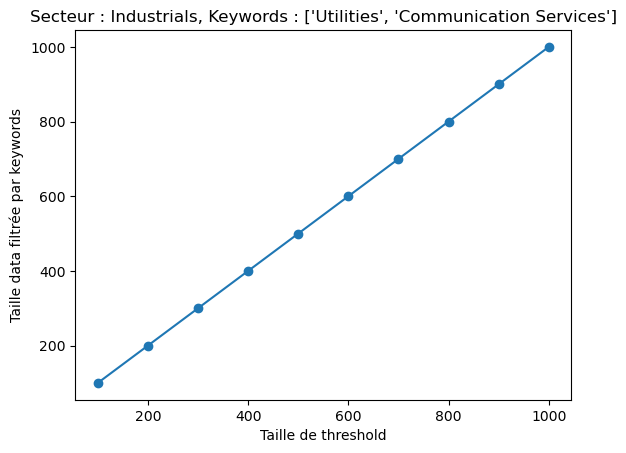

In [163]:
threshold_list = [100*i for i in range(1, 11)]
list_final_size = []
for threshold in threshold_list:
    filtered_df = reduce_df_size(df_full, test_sector, test_list_keyword, threshold)
    list_final_size.append(filtered_df.shape[0])
    
plt.plot(threshold_list, list_final_size, marker='o', linestyle='-')
plt.xlabel('Taille de threshold')
plt.ylabel('Taille data filtrée par keywords')
plt.title(f'Secteur : {test_sector}, Keywords : {test_list_keyword}')

# Join description and GDP similarities

In [73]:
data = load_preprocess_data_tokenized()
data = build_tfidf(data)
# df=data.copy()[:100]

In [ ]:
# df

In [65]:
def find_similar_companies(target_company, df, vector_column='vec_tfidf', n=5, similarity='cosine'):
    df=df.copy()
    df[vector_column] = df[vector_column].apply(lambda x: x.toarray()[0])
    target_vector = df.loc[df['companyName'] == target_company][vector_column]

    if target_vector.shape[0]>0:
        target_vector = target_vector.iloc[0]
    else:
        print("Vérifier le nom de l'entreprise.")
        return -1

    if similarity == 'cosine':
        similarities = cosine_similarity([target_vector], list(df[vector_column]))

        similar_companies = pd.DataFrame({'companyName': df['companyName'], 'Similarity': similarities[0], 'country': df['country']})
        similar_companies = similar_companies.sort_values(by='Similarity', ascending=False)

    return similar_companies

# find_similar_companies(target_company = 'Visa Inc.', df=df)

In [59]:
# ranking_similarity = find_similar_companies('Visa Inc.', df)
# display(ranking_similarity)

def build_similarity_GDP_column(ranking_similarity_description):
    
    ranking_similarity = ranking_similarity_description.copy()
                    
    GDP_similarity_matrix = build_GDP_similarity_matrix()
    dict_similarity_GDP = {}

    for index, row in ranking_similarity.iterrows():
        entreprise_similaire = row['companyName']
        pays_entreprise_similaire = row['country']
        distance_GDP = GDP_similarity_matrix.loc[ranking_similarity.iloc[0]['country'], pays_entreprise_similaire]  # le pays cible est : ranking_similarity.iloc[0]['country']
        dict_similarity_GDP[entreprise_similaire] = distance_GDP

    ranking_similarity['similarity_GDP'] = [dict_similarity_GDP[entreprise] for entreprise in ranking_similarity['companyName']]
    ranking_similarity.drop(columns=['country'], inplace=True)

    return ranking_similarity

In [60]:
def combine_similarities(ranking_similarity, beta=0.5):
    df=ranking_similarity.copy()
    df['Similarity'] = (1/(1+beta))*(df['Similarity']+beta*df['similarity_GDP'])
    df = df.drop(columns={'similarity_GDP'})
    return df

In [61]:
def compute_similarity(df, target_name='Visa Inc.'):
    df = df.copy()
    ranking_similarity_description = find_similar_companies(target_name, df)
    ranking_similarity_description_and_GDP = build_similarity_GDP_column(ranking_similarity_description)
    return combine_similarities(ranking_similarity_description_and_GDP, beta=0.5)

In [169]:
def get_line_tf_idf(target_name, columns, data, nb_peers):
    df_line = pd.DataFrame(columns=columns)

    keywords = get_random_keywords(target_name, data)
    sector = data[data['companyName']==target_name]['sector'].iloc[0]
    filtered_df = reduce_df_size(data, sector, keywords, threshold_size_final_group=200)
    similarity_matrix = compute_similarity(filtered_df, target_name).tail(-1).head(nb_peers).reset_index(drop=True)
    
    
    row_values = [target_name, 'tf_idf']
    for comp, score in zip(similarity_matrix['companyName'], similarity_matrix['Similarity']):
        row_values.extend([comp, score])
    df_line.loc[0] = row_values

    return df_line

def get_random_keywords(target_name, data, nombre_mots_a_extraire = 10):
    description = data[data['companyName']==target_name]['description'].to_list()
    mots = re.findall(r'\b\w+\b', description[0])
    
    keywords = random.sample(mots, min(nombre_mots_a_extraire, len(mots)))
    keywords = [word.lower() for word in keywords if word.lower() not in stopwords.words('english') and word not in string.punctuation]
    return keywords

In [164]:
# compute_similarity(filtered_df, target_name='Xcel Energy Inc.')
# compute_similarity(filtered_df, target_name='HEALTHeUNIVERSE, Inc.')

# Build comparison CSV

In [141]:
data = load_preprocess_data_tokenized()
data = build_tfidf(data)    
list_target_name = data.head(15)['companyName'].to_list()

In [178]:
def build_comparison_csv(list_target_name, data, nb_peers=20):
    """
    pour load data dans la cellule précédente: 
    data = load_preprocess_data_tokenized()
    data = build_tfidf(data)  
    list_target_name = data.head(15)['companyName'].to_list()
    """
    
    # Initialisation des columns
    columns = ['target', 'algo']
    for i in range(1, nb_peers+1):
        columns.append(f"company_{i}")
        columns.append(f"score_{i}")
    df_comparison = pd.DataFrame(columns=columns)
    
    # Pour chaque target, pour chaque algo : on ajoute une ligne
    for target in list_target_name:
        
        line_tfidf = get_line_tf_idf(target, columns, data, nb_peers)
        
        # line_other_algo = get_line_other_algo(target, columns, nb_peers...
        
        df_comparison = pd.concat([df_comparison, line_tfidf]) # , line_other_algo
    
    return df_comparison

df_comparison = build_comparison_csv(list_target_name, data, nb_peers=20)
df_comparison
# df_comparison.to_csv('peers_comparison.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,target,algo,company_1,score_1,company_2,score_2,company_3,score_3,company_4,score_4,...,company_16,score_16,company_17,score_17,company_18,score_18,company_19,score_19,company_20,score_20
0,Visa Inc.,tf_idf,BLS International Services Limited,0.421133,Mogo Inc.,0.507311,Wirecard AG,0.480408,AppTech Payments Corp.,0.541191,...,First Busey Corporation,0.471283,GreenLink International Inc.,0.469804,"Cygnus eTransaction Group, Inc.",0.466361,"United Bancorporation of Alabama, Inc.",0.461597,"FLEETCOR Technologies, Inc.",0.461263
0,"Texas Roadhouse, Inc.",tf_idf,"Brinker International, Inc.",0.760914,"Dine Brands Global, Inc.",0.744808,"Fiesta Restaurant Group, Inc.",0.715490,"Bloomin' Brands, Inc.",0.710027,...,Fujio Food Group Inc.,0.534810,"RAVE Restaurant Group, Inc.",0.618538,Sfinks Polska S.A.,0.484747,Biglari Holdings Inc.,0.607780,AmRest Holdings SE,0.504550
0,"Lamb Weston Holdings, Inc.",tf_idf,AMCON Distributing Company,0.547496,Seneca Foods Corporation,0.525945,"McCormick & Company, Incorporated",0.522798,"ROYAL HOLDINGS Co., Ltd.",0.426634,...,Naturally Splendid Enterprises Ltd.,0.420751,Yondoshi Holdings Inc.,0.373332,LH Group Limited,0.405231,Restaurant Brands International Inc.,0.415104,"Whole Earth Brands, Inc.",0.460615
0,Intact Financial Corporation,tf_idf,"American Financial Group, Inc.",0.720237,RLI Corp.,0.705394,Cincinnati Financial Corporation,0.684380,CNA Financial Corporation,0.649133,...,"Everest Group, Ltd.",0.481710,"Everest Re Group, Ltd.",0.479902,"Greenlight Capital Re, Ltd.",0.504449,SCOR SE,0.518968,Aurskog Sparebank,0.469483
0,"OPKO Health, Inc.",tf_idf,"Kissei Pharmaceutical Co., Ltd.",0.444565,Milestone Pharmaceuticals Inc.,0.488315,Telix Pharmaceuticals Limited,0.507920,"Cyclo Therapeutics, Inc.",0.529873,...,"NanoCarrier Co., Ltd.",0.414192,"Samjin Pharmaceuticals Co., Ltd.",0.410140,"OncoTherapy Science, Inc.",0.413486,"Mesa Laboratories, Inc.",0.502109,"Palatin Technologies, Inc.",0.501252
0,Ferroglobe PLC,tf_idf,"Shanxi Taigang Stainless Steel Co., Ltd.",0.500629,Angang Steel Company Limited,0.462382,VISA Steel Limited,0.409892,Jayaswal Neco Industries Limited,0.406656,...,Walsin Lihwa Corporation,0.365246,Manaksia Coated Metals & Industries Limited,0.325998,Elementis plc,0.483168,"Chih Lien Industrial Co., Ltd.",0.362538,Innospec Inc.,0.416195
0,Hanesbrands Inc.,tf_idf,"Turning Point Brands, Inc.",0.442275,KP Tissue Inc.,0.384725,AB Electrolux (publ),0.379754,Universal Robina Corporation,0.259993,...,Healthia Limited,0.367842,Embpar Participacoes S.A.,0.246499,Compagnie de Saint-Gobain S.A.,0.316225,Q P Group Holdings Limited,0.331734,Gerdau S.A.,0.243640
0,"Esports Entertainment Group, Inc.",tf_idf,"Golden Entertainment, Inc.",0.463583,Evolution AB (publ),0.399470,Starlight Culture Entertainment Group Limited,0.413519,"PlayAGS, Inc.",0.338374,...,IQGeo Group plc,0.361708,Oxford Metrics plc,0.360771,Future FinTech Group Inc.,0.310709,The Coretec Group Inc.,0.309607,Skylight Health Group Inc.,0.336827
0,"WW International, Inc.",tf_idf,Adobe Inc.,0.502622,Ailleron S.A.,0.346799,"Harte Hanks, Inc.",0.471367,"Salesforce, Inc.",0.469551,...,INTERSHOP Communications Aktiengesellschaft,0.384327,Asmallworld AG,0.416467,"SeaChange International, Inc.",0.444221,Jabil Inc.,0.440357,DCC plc,0.395882
0,"CommScope Holding Company, Inc.",tf_idf,Belden Inc.,0.636816,Vecima Networks Inc.,0.563429,"ADTRAN Holdings, Inc.",0.603938,Cambium Networks Corporation,0.579682,...,Xperi Holding Corporation,0.521680,"Furukawa Electric Co., Ltd.",0.427364,International Research Corporation Public Comp...,0.368334,Samart Telcoms Public Company Limited,0.366107,"Telephone and Data Systems, Inc.",0.514995
